#1 - Escolha uma estratégia de tratamento de valores faltantes e outliers e justifique sua escolha.


In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from statistics import mean

In [18]:
df = pd.read_csv('qualidade_do_ar.csv', sep=';')
print(df.shape)
print(df.info()) 

(9357, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   PT08.S1(CO)    8991 non-null   float64
 3   NMHC(GT)       914 non-null    float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1023.5+ KB
None


In [19]:
#number NaN in each column
Number_NAN_column = df.isna().sum() 
print(Number_NAN_column)

Date                0
Time                0
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


### I tried replace NaN and Outliers by mean and median but it didn't work. So, I decided to drop rows with NaN and outliers for a better prediction 

In [20]:
#drop NMHC(GT) with 8443 NaN!!
df = df.drop(columns=['NMHC(GT)'], )

In [21]:
#Drop rows with NaN
df = df.dropna()
df.reset_index(drop=True, inplace=True)
print(df.shape)
redution = 100-((7393*100)/9357)
print('redution =',round(100-((df.shape[0]*100)/9357)),'% in data')

(7393, 13)
redution = 21 % in data


##Drop rows with outliers

### PT08.S1 (CO) – Variável de predição





In [22]:
#show boxplot
def column_outliers(column_data):
    print('Skew'      ,column_data,' = ',df[column_data].skew())
    plt.boxplot(df[column_data]) 
    plt.show()

Skew PT08.S1(CO)  =  0.7228106426764601


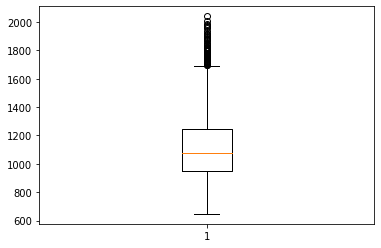

Skew PT08.S1(CO)  =  0.48140441076152274


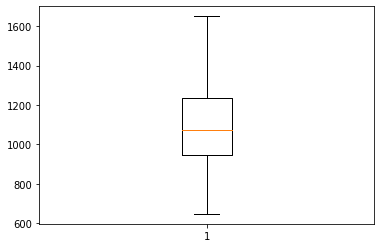

In [23]:
#PT08.S1 (CO) – Variável de predição
#The Skew was reduced
column_outliers('PT08.S1(CO)')  
index = df[(df['PT08.S1(CO)'] >1650)].index
#drop rows with outliers > 1650
df.drop(index, inplace=True)
column_outliers('PT08.S1(CO)')  



### Benzene Concentration (mg/m^3)

Skew C6H6(GT)  =  1.0263308064151224


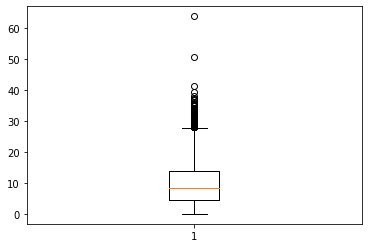

Skew C6H6(GT)  =  0.6370627505105422


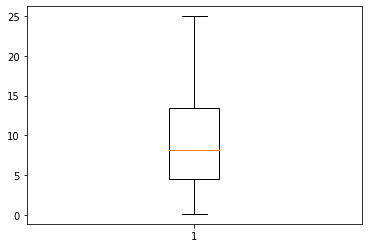

In [24]:
#Benzene Concentration (mg/m^3)
#drop outliers > 25 
#The Skew was reduced
column_outliers('C6H6(GT)') 
index = df[(df['C6H6(GT)'] >25)].index
df.drop(index, inplace=True)
column_outliers('C6H6(GT)')  

### PT08.S2 (NMHC)

Skew PT08.S2(NMHC)  =  0.13968637959010924


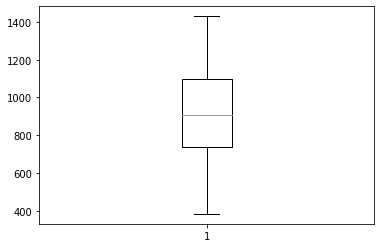

In [25]:
#PT08.S2 (NMHC)
#no Outliers
column_outliers('PT08.S2(NMHC)') 

### NOx Concentration (ppb)

Skew NOx(GT)  =  1.4943399925787526


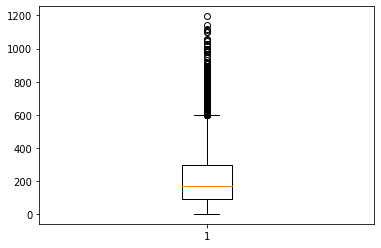

Skew NOx(GT)  =  0.7981572916651953


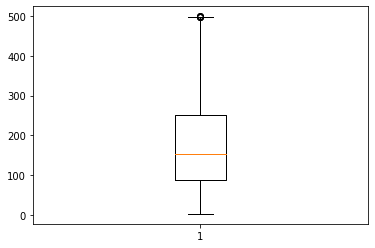

In [26]:
#NOx Concentration (ppb)
#drop rows with outliers > 500
#The Skew was reduced
column_outliers('NOx(GT)')
index = df[(df['NOx(GT)'] > 500)].index
df.drop(index, inplace=True)
column_outliers('NOx(GT)')

### PT08.S3 (NOx)

Skew PT08.S3(NOx)  =  1.470289243012836


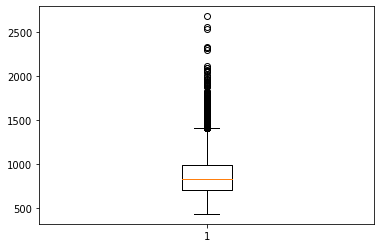

Skew PT08.S3(NOx)  =  0.46636353122183083


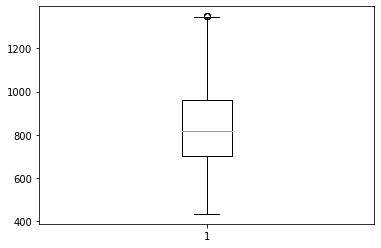

In [27]:
#PT08.S3 (NOx)
#drop rows with outliers > 1350
#The Skew was reduced
column_outliers('PT08.S3(NOx)') 
index = df[(df['PT08.S3(NOx)'] > 1350)].index
df.drop(index, inplace=True)
column_outliers('PT08.S3(NOx)')

### NO2 Concentration (mg/m^3)

Skew NO2(GT)  =  0.40463814044989105


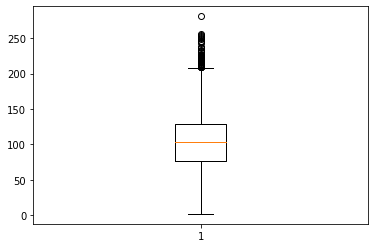

Skew NO2(GT)  =  0.1862831496148835


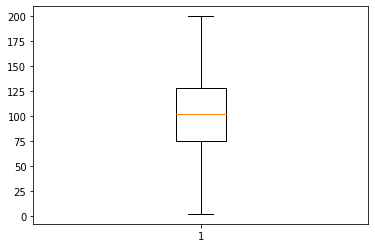

In [28]:
#NO2 Concentration (mg/m^3)
#drop rows with outliers > 200
#The Skew was reduced
column_outliers('NO2(GT)') 
index = df[(df['NO2(GT)'] > 200)].index
df.drop(index, inplace=True)
column_outliers('NO2(GT)')  


### PT08.S4 (NO2s)

Skew PT08.S4(NO2)  =  -0.08643454280605749


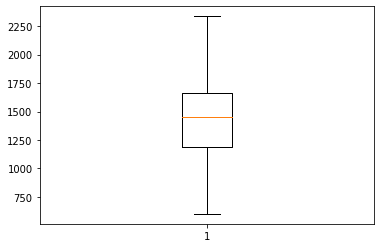

In [29]:
#PT08.S4 (NO2s)
#No outliers
column_outliers('PT08.S4(NO2)') 

### PT08.S5 (O3)

Skew PT08.S5(O3)  =  0.413459550727803


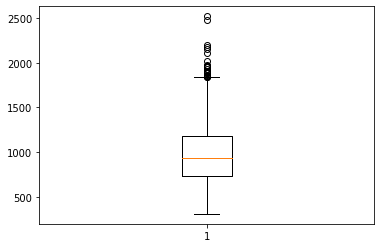

Skew PT08.S5(O3)  =  0.27321620036098454


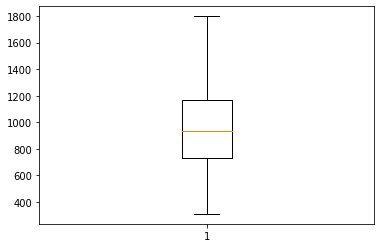

In [30]:
# PT08.S5 (O3)
#drop rows with outliers > 1800
#The Skew was reduced
column_outliers('PT08.S5(O3)') 
index = df[(df['PT08.S5(O3)'] > 1800)].index
df.drop(index, inplace=True)
column_outliers('PT08.S5(O3)')  

### Temperature (C)

Skew T  =  0.2644606806127672


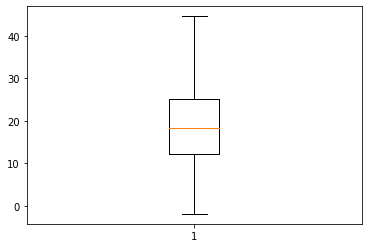

In [31]:
# Temperature (C)
#No outliers
column_outliers('T') 

### Relative Humidity (%)

Skew RH  =  0.04598019289656245


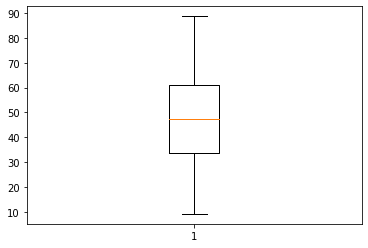

In [32]:
# Relative Humidity (%)
#No outliers
column_outliers('RH') 

### AH Absolute Humidity

Skew AH  =  0.48204364831274576


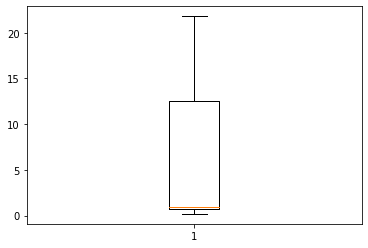

In [33]:
# AH Absolute Humidity
#No outliers
column_outliers('AH') 

#reset index df
df.reset_index(drop=True, inplace=True)

# 2 - Para as quartas-feiras, quais os horários de pico na cidade (de maior concentração de CO) ?

In [34]:
import datetime
from statistics import mean

In [35]:
#Function to change date format of Day/Month/year to year-month-day
def format_date(dt): 
    #dt = '11/03/2004'
    day, month, year = (int(x) for x in dt.split('/'))    
    ans = datetime.date(year, month, day)
    week_day = ans.strftime("%A")
    #print (ans.strftime("%A"))
    return week_day
    


In [36]:
#create wednesday dataframe to analysis     
df_wednesday = pd.DataFrame([ ], columns = list(df.columns))
for i in range(len(df['Date'])):
   check_day = format_date(df.loc[i,'Date'])
   if check_day == 'Wednesday':
     a_row = df.loc[i,:]
     row_df = pd.DataFrame([a_row])
     df_wednesday = pd.concat([row_df, df_wednesday], ignore_index=True)

In [37]:
#create 2 lists to save hours of day and the CO mean to every our of wednesdays
hours = list(pd.date_range("00:00:00", "23:00:00", freq="60min").strftime('%H:%M:%S'))
mean_hours = [ ]
for i in range(len(hours)):
    acumulador = [ ]    
    for j in range(len(df_wednesday['Time'])):
        colon_hour =  df_wednesday.loc[j,"Time"].replace('.',":")
        if  colon_hour  == hours[i]:        
            acumulador.append(df_wednesday.loc[j,"PT08.S1(CO)"]) 
    mean_hours.append(mean(acumulador))      

<BarContainer object of 24 artists>

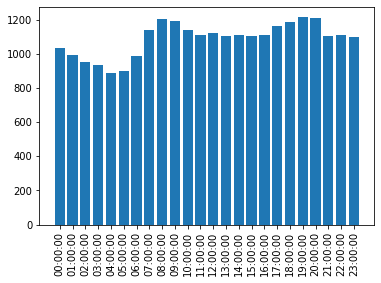

In [38]:
y_pos = range(len(hours))
# Rotation of the bars names
plt.xticks(y_pos,hours, rotation=90)
#Showing the bar graph
plt.bar(y_pos, mean_hours)

In [40]:
#Hour and max concentration of CO
print('The hour of max concentration of CO is',mean_hours.index(max(mean_hours)),':00:00')
print('The concentration of CO at',mean_hours.index(max(mean_hours)),':00 is',max(mean_hours))
#After 19h, 8h is the hour of higher concentration of CO, and it is logic because is the hour of heavy car traffic

The hour of max concentration of CO is 19 :00:00
The concentration of CO at 19 :00 is 1214.6153846153845


# 3- Quais as variáveis mais correlacionadas com a variável de predição?

In [44]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns
import scipy.stats

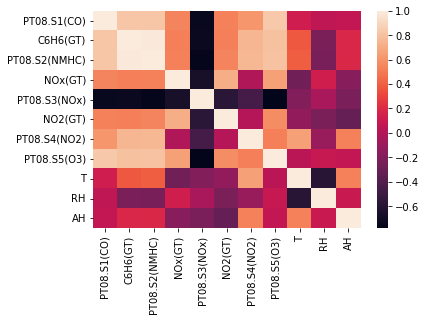

In [42]:
#Correlation matrix to heat map
cormat = df.corr()
round(cormat,2)
sns.heatmap(cormat);

### The most most correleted data with CO concentration are C6H6(GT), PT08.S2(NMHC) e PT08.S5(O3) by the visual identification

Pearson correlation coefficient 0.8193273217935554


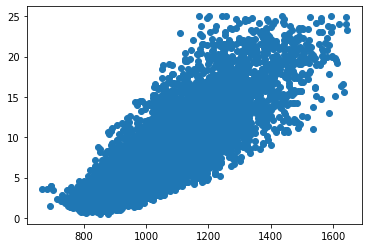

In [46]:
#'PT08.S1 (CO)' and 'C6H6(GT)'
X = np.array(df.iloc[:, 2])
y = np.array(df.iloc[: ,3])
#Pearson correlation coefficient (linear correlation between data)
print('Pearson correlation coefficient',scipy.stats.pearsonr(X, y)[0])
plt.scatter(X,y)
plt.show()

Pearson correlation coefficient 0.8231327230654946


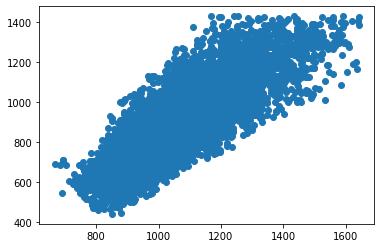

In [47]:
#'PT08.S1 (CO)' and 'PT08.S2(NMHC)'
X = np.array(df.iloc[:, 2])
y = np.array(df.iloc[: ,4])
#Pearson correlation coefficient (linear correlation between data)
print('Pearson correlation coefficient',scipy.stats.pearsonr(X, y)[0])
plt.scatter(X,y)
plt.show()

Pearson correlation coefficient 0.8391882080494647


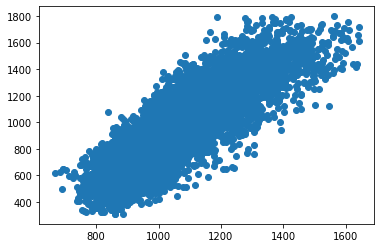

In [48]:
#'PT08.S1 (CO)' and 'PT08.S5(O3)'
X = np.array(df.iloc[:, 2])
y = np.array(df.iloc[: ,9])
#Pearson correlation coefficient (linear correlation between data)
print('Pearson correlation coefficient',scipy.stats.pearsonr(X, y)[0])
plt.scatter(X,y)
plt.show()

# 4 - Crie um modelo de regressão de PT08.S1 a partir das demais variáveis. Avalie usando as métricas que julgar pertinente para o problema.

### Multiple Regression

In [49]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [50]:
# X uses the most well related columns with 'PT08.S1(CO)'
X = df[['C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S5(O3)' ]]
y = df['PT08.S1(CO)']

In [51]:
#Train and Test Dataset
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=4)

In [62]:
#Multiple Regression
# Multiple regression is like linear regression, but with
# more than one independent value, meaning that we try
# to predict a value based on two or more variables.

#Fit model
regr = linear_model.LinearRegression()
regr.fit(train_X,train_y)

LinearRegression()

In [61]:
#The R-squared score 
#r2=0 low correlation e r2=1 high correlation
#R2 for train dataset 
r2_train = round(r2_score(train_y,regr.predict(train_X)),ndigits=2)
print(r2_train,'is r2 for train dataset')
#R2 for  test dataset  
r2_test = round(r2_score(test_y,regr.predict(test_X)), ndigits=2)
print(r2_test,'is r2 for test dataset')

0.76 is r2 for train dataset
0.77 is r2 for test dataset
